In [97]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score ,mean_squared_error,classification_report,recall_score,f1_score,precision_score,r2_score
from sklearn.feature_selection import SelectFromModel,VarianceThreshold
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE,f_regression,SelectKBest
from imblearn.under_sampling import TomekLinks
import warnings
warnings.filterwarnings('ignore')

In [98]:
# Load and prepare dataset
data = pd.read_csv(r'C:\Users\bhasy\Downloads\BlackFriday\train.csv')
#data.set_index(['User_ID','Product_ID'],inplace=True)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [99]:
# Identifying missing values
def missing_datas(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

missing_data = missing_datas(data)
print(missing_data)

                             Total    Percent
Product_Category_3          383247  69.672659
Product_Category_2          173638  31.566643
Purchase                         0   0.000000
Product_Category_1               0   0.000000
Marital_Status                   0   0.000000
Stay_In_Current_City_Years       0   0.000000
City_Category                    0   0.000000
Occupation                       0   0.000000
Age                              0   0.000000
Gender                           0   0.000000
Product_ID                       0   0.000000
User_ID                          0   0.000000


In [100]:
#filling the missing values with zeroes
data.fillna(0,inplace=True)
missing_data = missing_datas(data)
print(missing_data)

                            Total  Percent
Purchase                        0      0.0
Product_Category_3              0      0.0
Product_Category_2              0      0.0
Product_Category_1              0      0.0
Marital_Status                  0      0.0
Stay_In_Current_City_Years      0      0.0
City_Category                   0      0.0
Occupation                      0      0.0
Age                             0      0.0
Gender                          0      0.0
Product_ID                      0      0.0
User_ID                         0      0.0


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [102]:
#Removing the + symbol from the years column and converting the products column to INT
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].str.split('+',expand=True)[0].astype(int)
data['Product_ID'] = data['Product_ID'].str.split('P0',expand=True)[1].astype(int)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,69042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,87842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,85442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,285442,M,55+,16,C,4,0,8,0.0,0.0,7969


In [103]:
#Check numeric and categorical variables
def numeric(dataset):
    numeric_cols = dataset.select_dtypes(include='number').columns
    return numeric_cols
def categorical(dataset):
    categorical_cols = dataset.select_dtypes(exclude = 'number').columns
    return categorical_cols
numeric_cols = numeric(data)
categorical_cols = categorical(data)
print("Numerical features")
print(numeric_cols)
print("=============")
print("Categorical features")
print(categorical_cols)

Numerical features
Index(['User_ID', 'Product_ID', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase'],
      dtype='object')
Categorical features
Index(['Gender', 'Age', 'City_Category'], dtype='object')


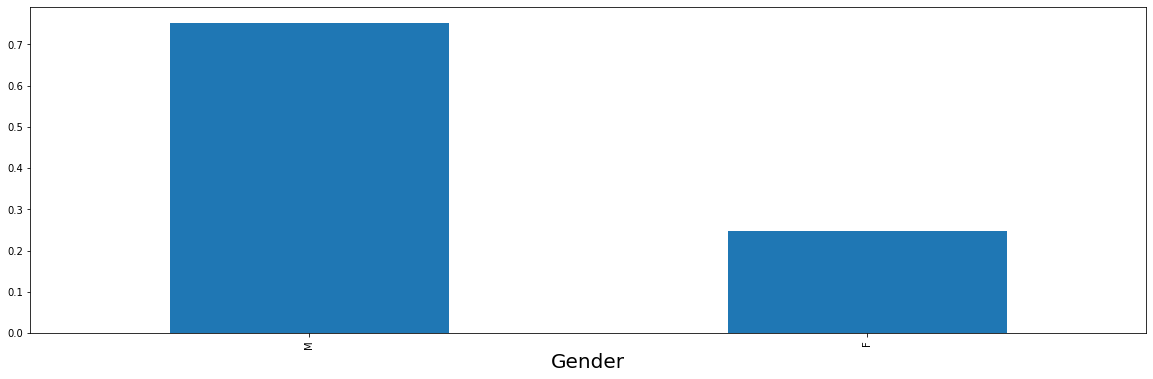

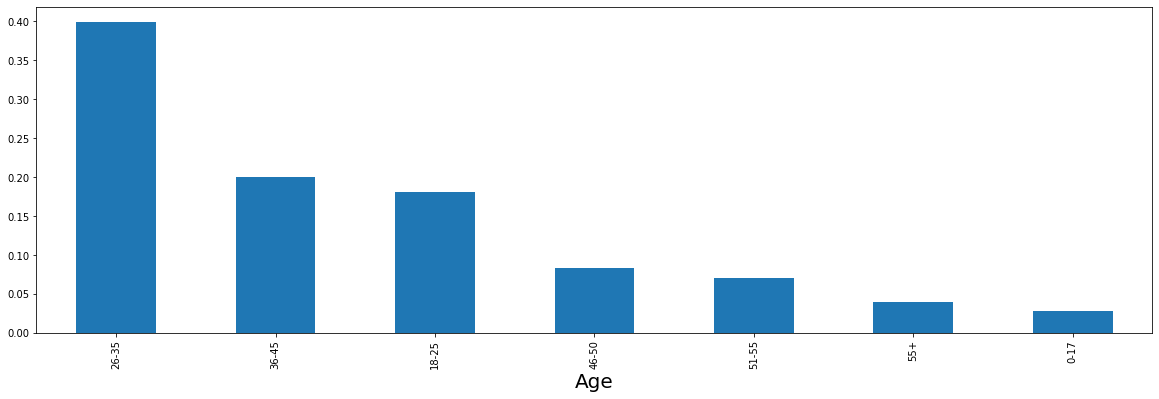

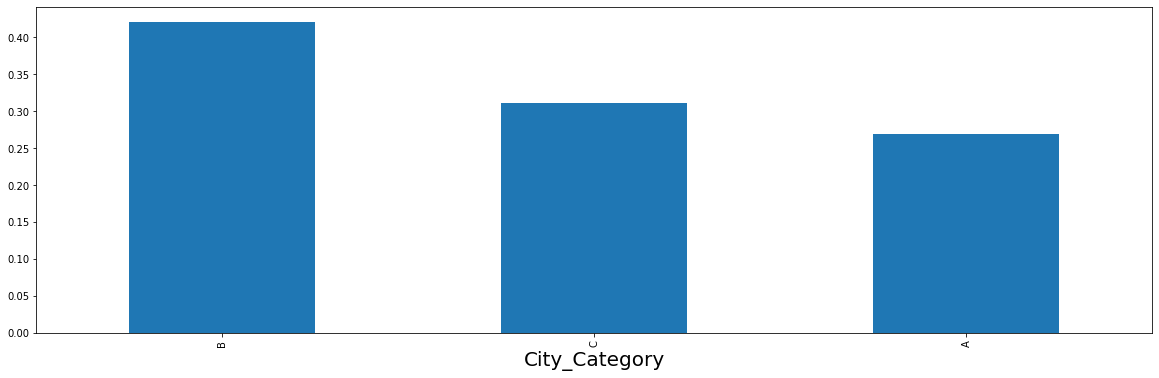

In [104]:
# Univariate analysis on Categorical data
def plot_categorical_columns(df):
    categorical_data = categorical(df)
    df = df[categorical_data]
    for i in df:
        plt.figure(figsize=(20,6))
        plt.xlabel(i,fontsize=20)
        df[i].value_counts(normalize=True).plot(kind='bar')
        plt.show()
plot_categorical_columns(data)
#Maximum no. of users in the data belong to the middle age group i.e.26-35
#

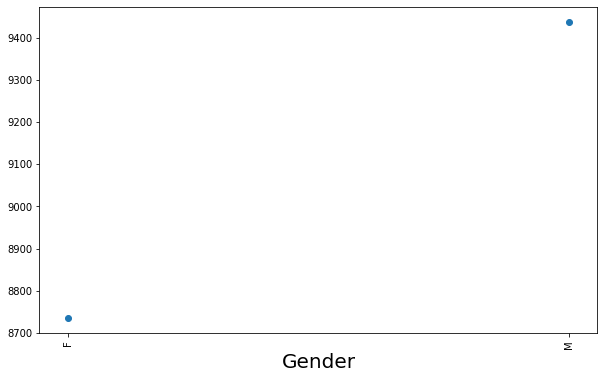

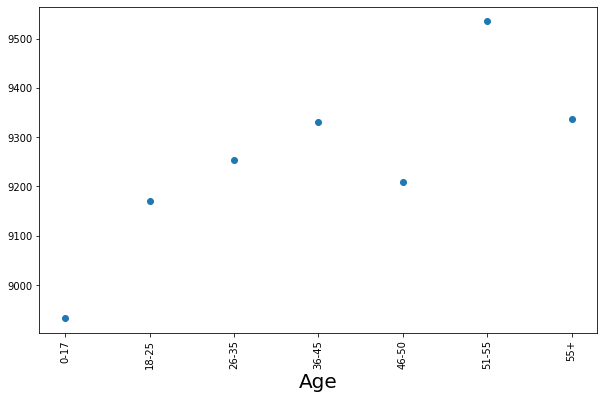

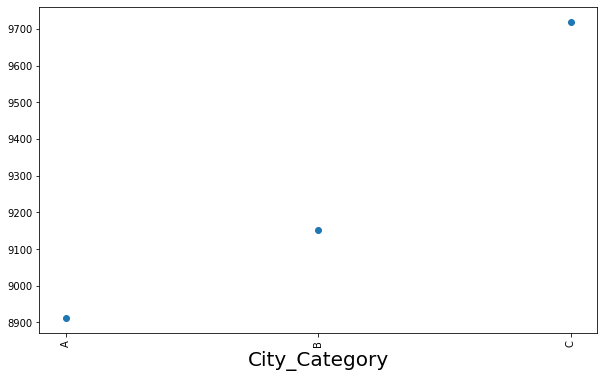

In [105]:
# Bivariate Analysis on categorical columns
def bivariate_analysis_categorical(df):
    cols = categorical(df)
    for col in cols:
        if col in categorical(df):
            plt.figure(figsize= (10,6))
            df_grouped = df.groupby(col)[['Purchase']].mean()
            plt.scatter(df_grouped.index,df_grouped['Purchase'])
            plt.xlabel(col,fontsize=20)
            plt.xticks(rotation='vertical')
            plt.show()
bivariate_analysis_categorical(data)

-> The average purchase value is varying from male to female by 700$
-> Max avg purchase value is made by the people in the age group of 51-55. As the age increases the avg amount spent is also increasing and when the age bcomes 55+ the purchase value comes down.
-> Users from the city category C have made the max avg purchase.

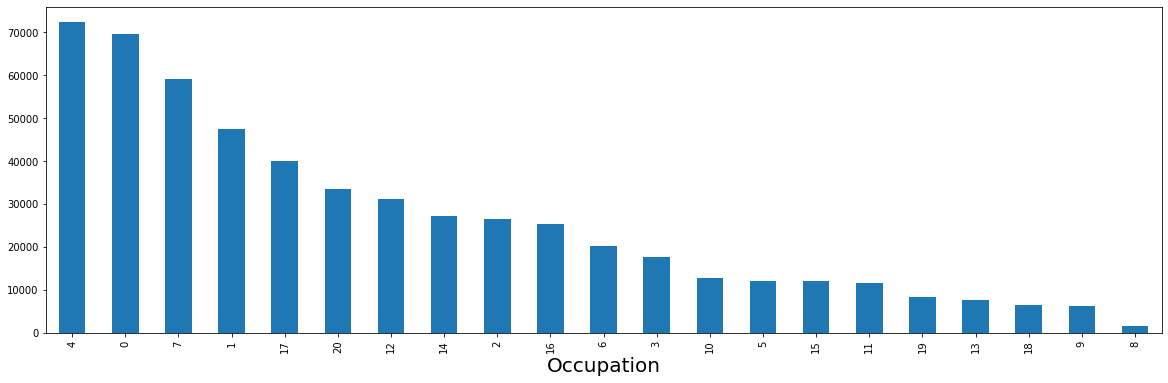

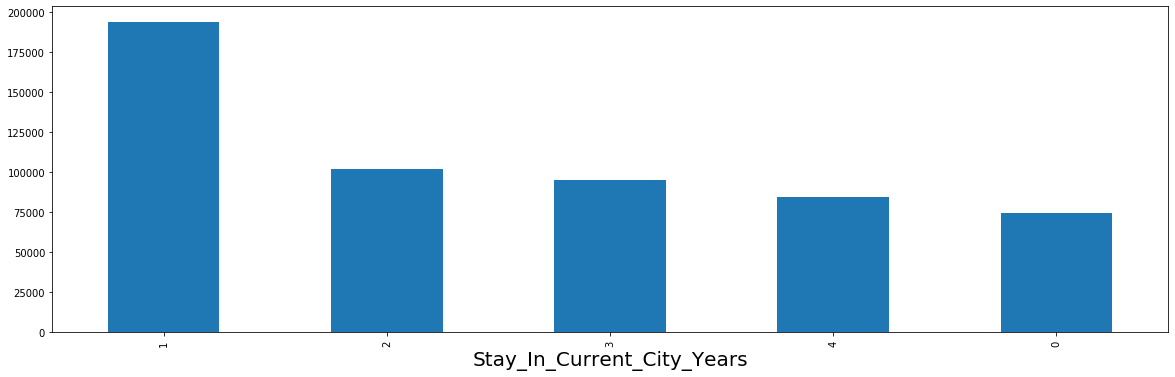

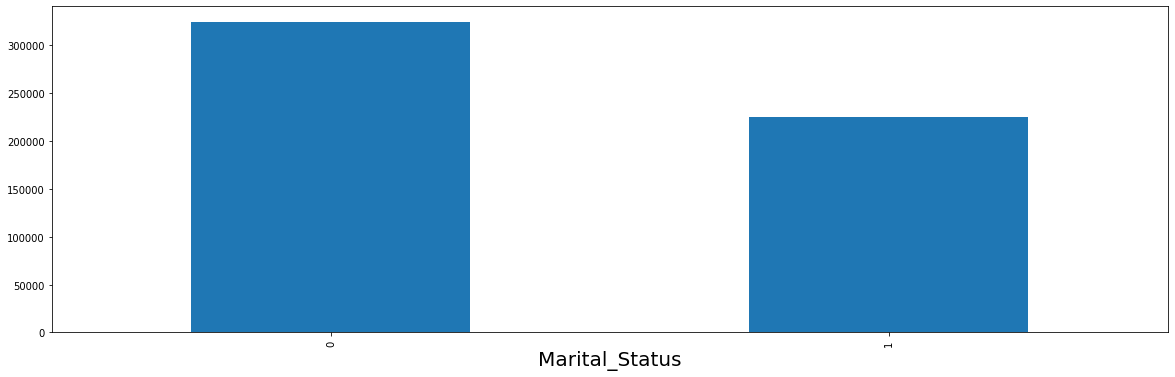

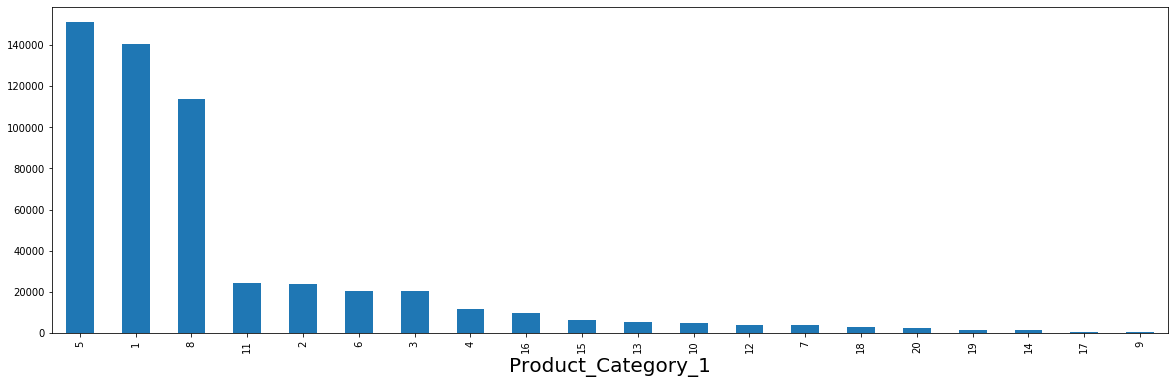

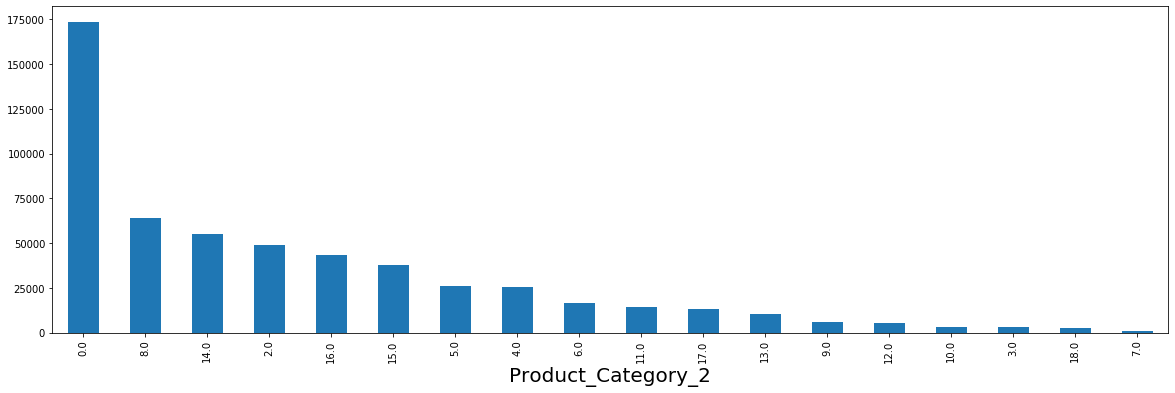

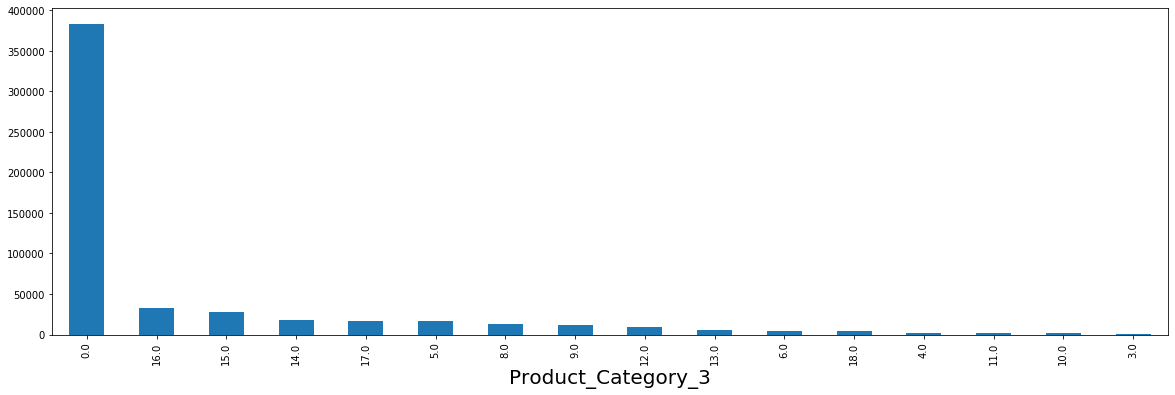

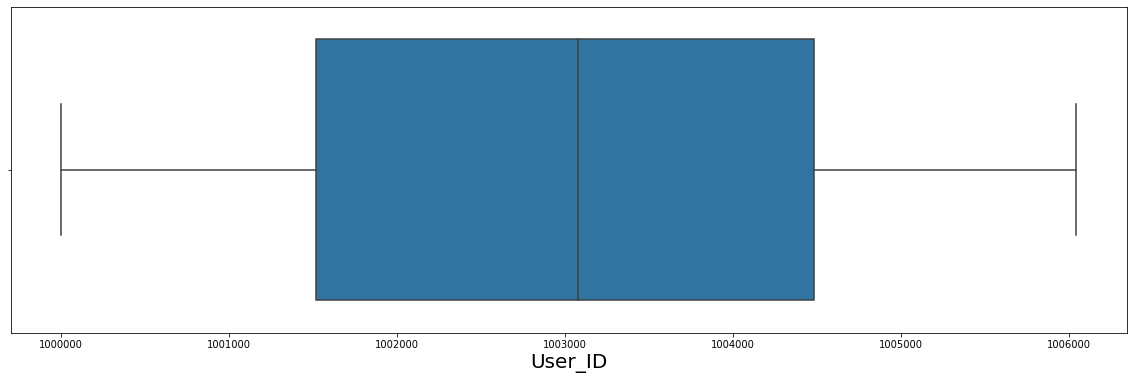

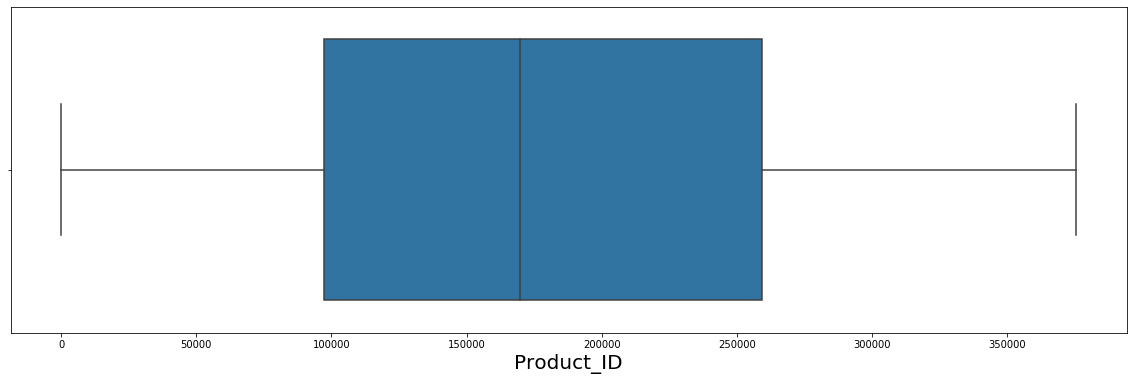

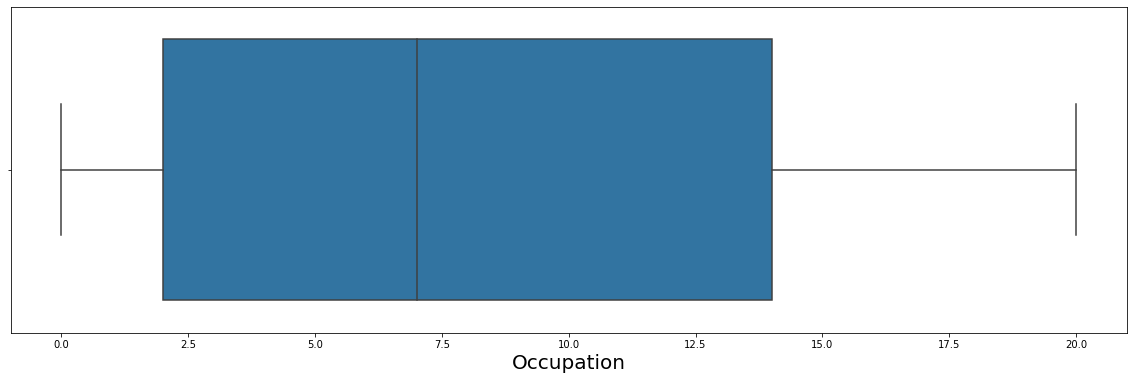

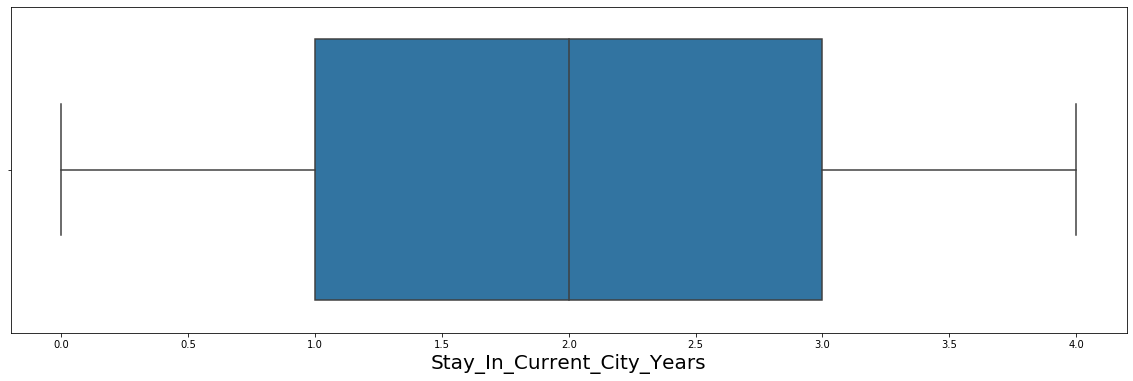

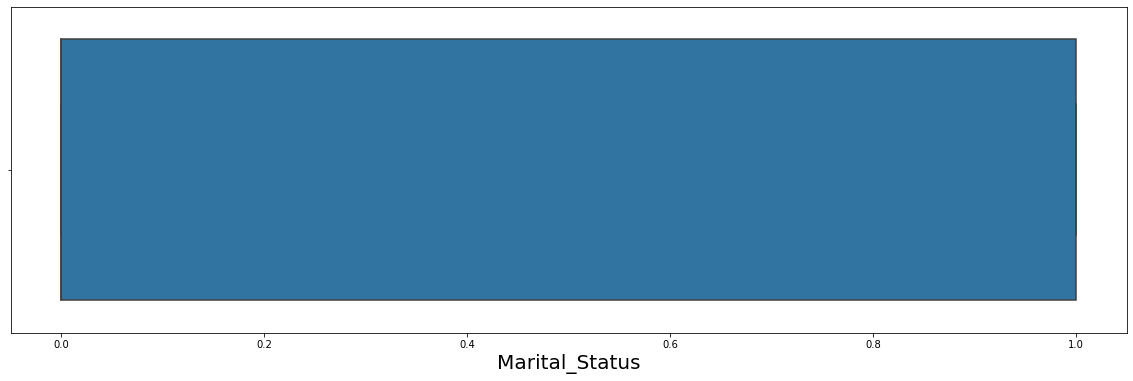

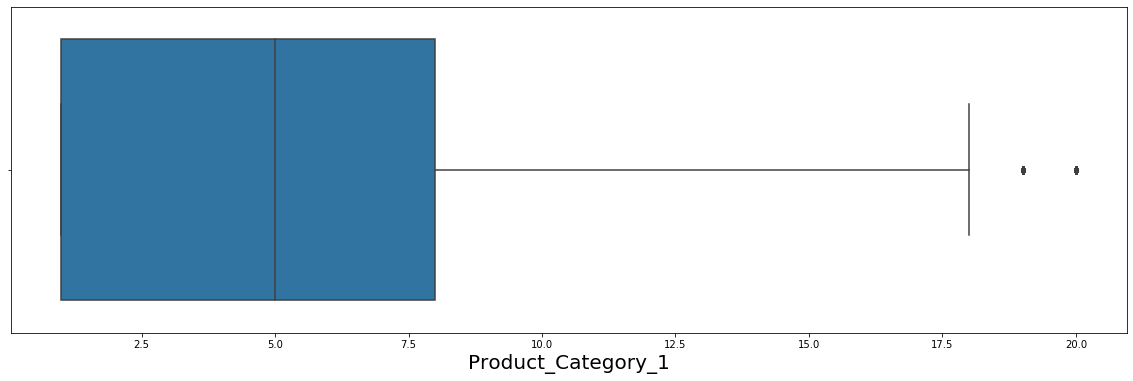

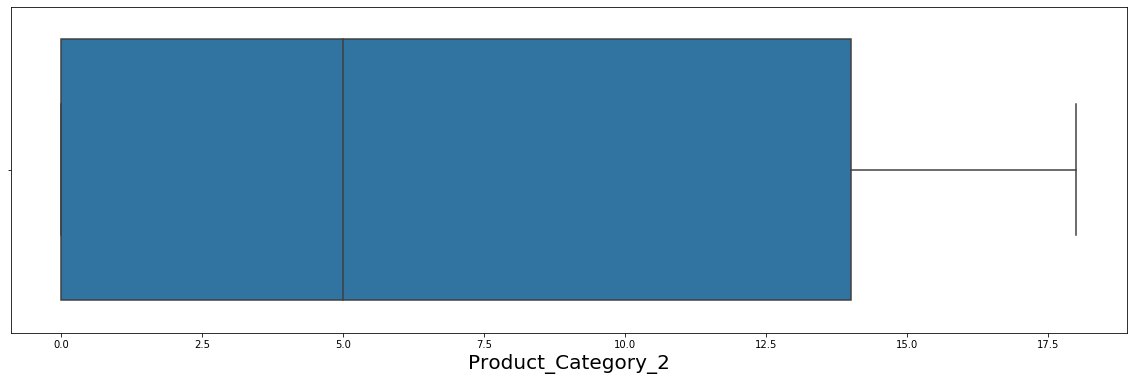

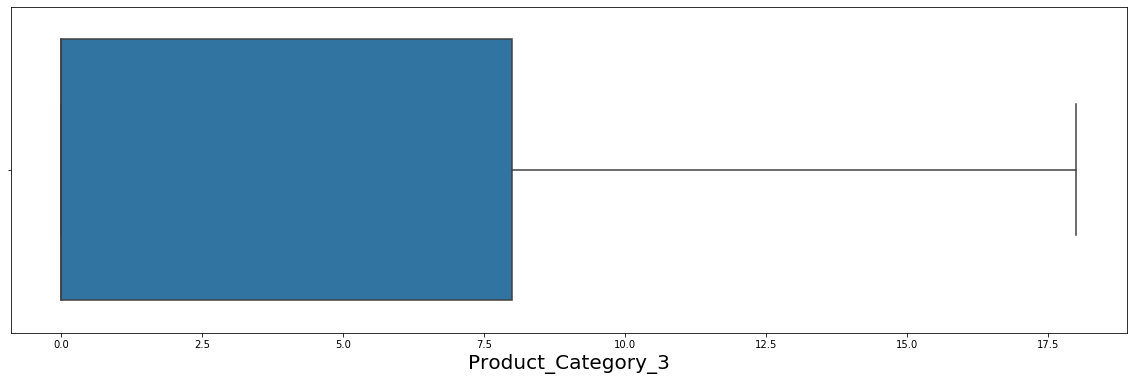

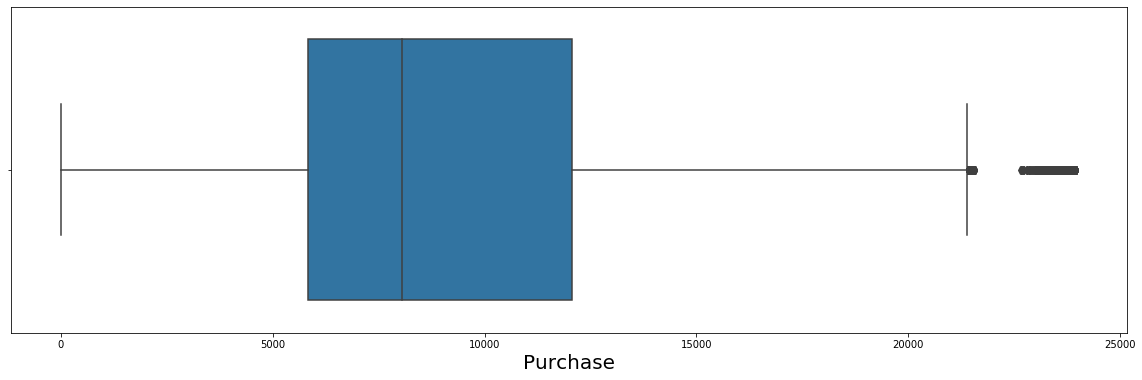

In [106]:
# Univariate Analysis on continuous columns
# Plot Histograms
def plot_continuous_columns(df):
    numeric_cols = numeric(df)
    numeric_cols = numeric_cols.drop(['User_ID','Product_ID','Purchase'])
    df = df[numeric_cols]
    for i in range(0,len(numeric_cols)):
        plt.figure(figsize = (20,6))
        df[numeric_cols[i]].value_counts().plot(kind='bar')
        plt.xlabel(numeric_cols[i],fontsize=20)
        plt.show()
#Plot BoxPlots
def plot_box_plots(df):
    numeric_cols = numeric(df)
    df = df[numeric_cols]
    for i in range(0,len(numeric_cols)):
        plt.figure(figsize = (20,6))
        sns.boxplot(df[numeric_cols[i]])
        plt.xlabel(numeric_cols[i],fontsize=20)
        plt.show()
plot_continuous_columns(data)
plot_box_plots(data)

-> The product Category 5,1 and 8 are being purchased in high quantities compared to other categories
-> Majority of the users belong to the occupations 4,0,7 and 1
-> Users are staying in the current city mostly for 1 year.
-> Most of the users marital status is unmarried.

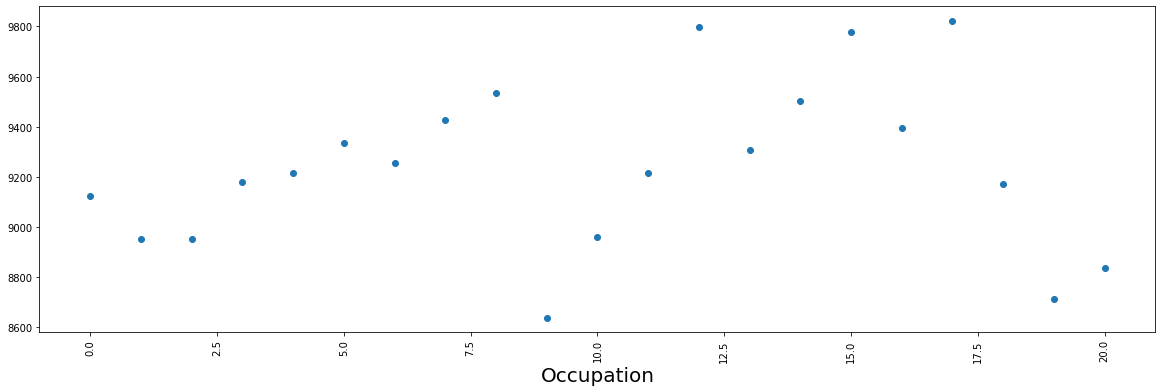

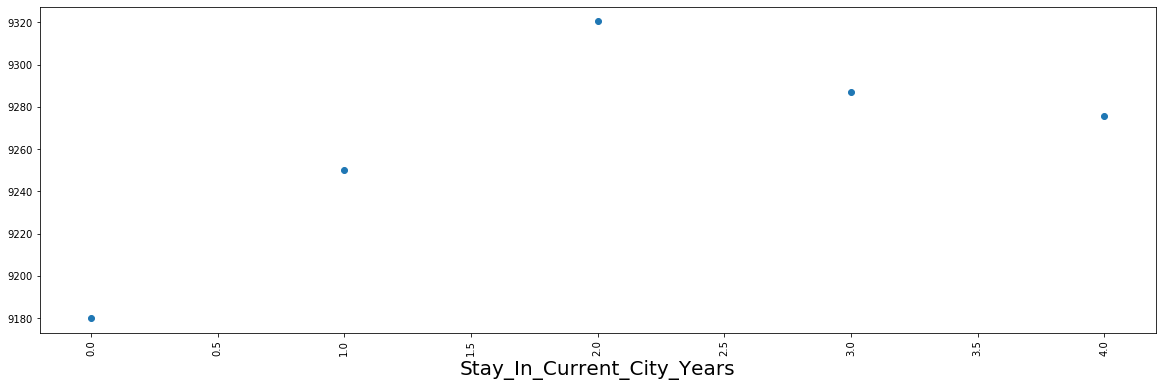

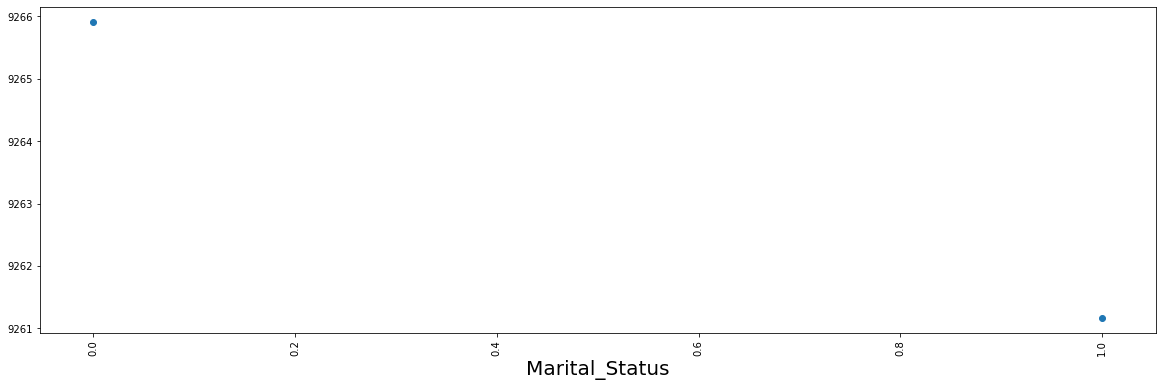

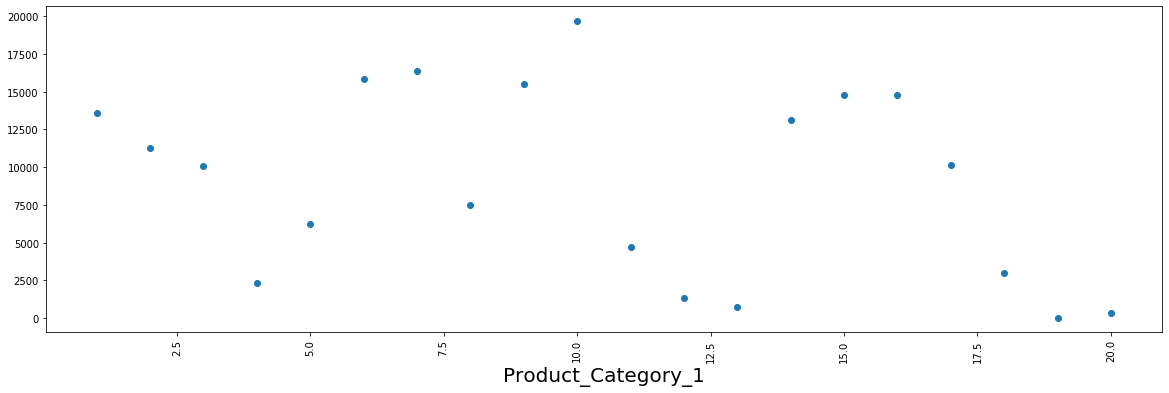

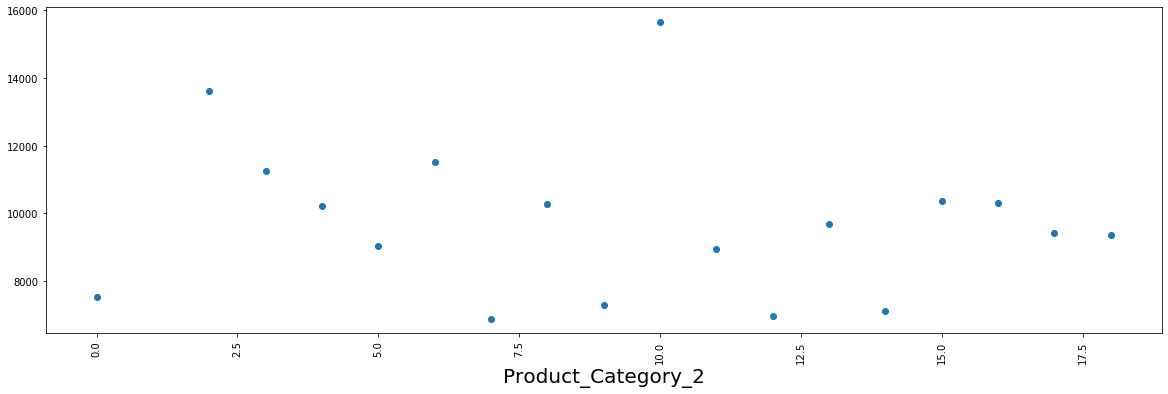

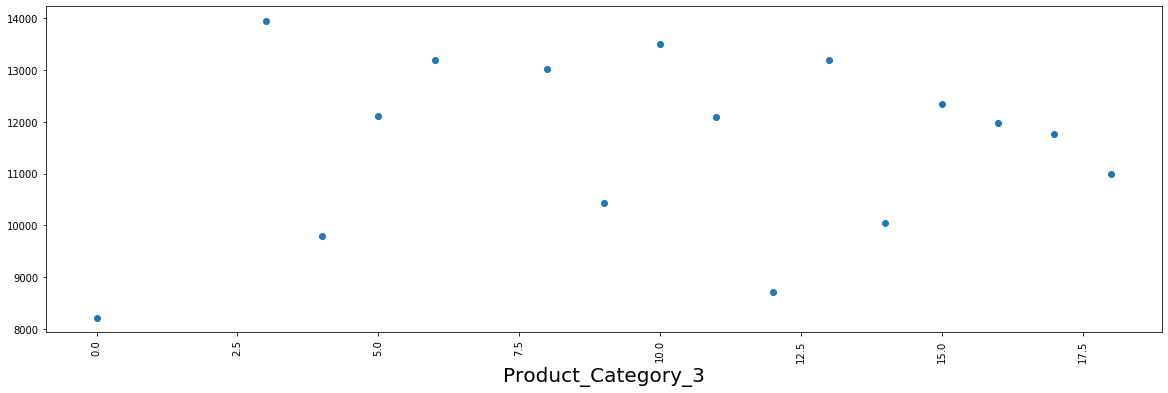

In [107]:
# Bivariate Analysis on numerical columns
def bivariate_analysis_numerical(df):
    cols = numeric(df)
    cols = cols.drop(['User_ID','Product_ID','Purchase'])
    for col in cols:
        if col in numeric(df):
            plt.figure(figsize= (20,6))
            df_grouped = df.groupby(col)[['Purchase']].mean()
            plt.scatter(df_grouped.index,df_grouped['Purchase'])
            plt.xlabel(col,fontsize=20)
            plt.xticks(rotation='vertical')
            plt.show()
bivariate_analysis_numerical(data)

-> Users with occupation 12,15,17 have made max avg purchase values
-> People who have stayed in current city for more than a year have made more purchases comparitively
-> Avg max purchase value doesnt differ much between married and unmarried users
-> Product Category doesnt follow any trend with respect to the purchase value

In [108]:
products = data.groupby(['User_ID'],as_index=False)['Product_ID'].agg({"Products_count":"count"}).sort_values(by='Products_count', ascending=False)
Total_purchase = data.groupby(['User_ID'],as_index= False)['Purchase'].agg({"Purchase_value":"sum"}).sort_values(by='Purchase_value', ascending=False)
data_products = pd.merge(data, products, on = 'User_ID')
data_purchase = pd.merge(data,Total_purchase, on = 'User_ID')

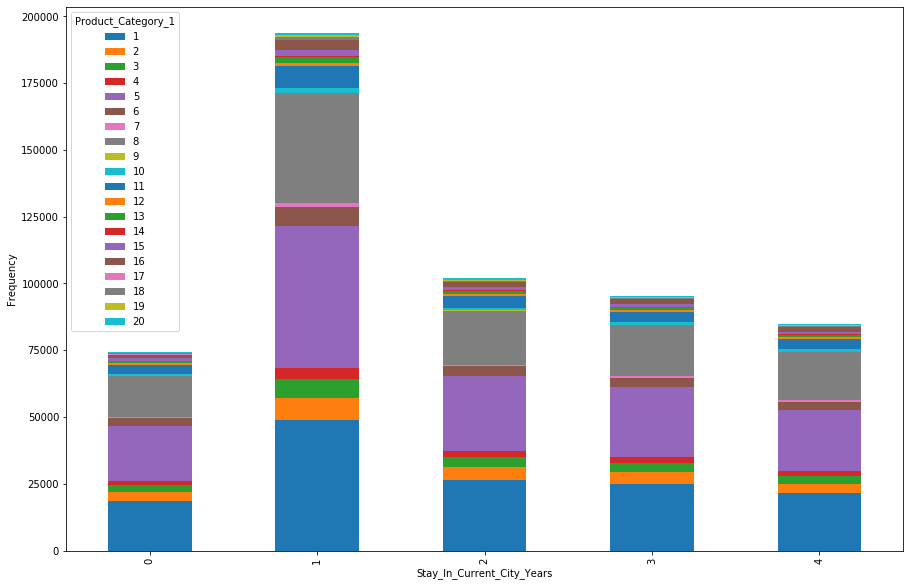

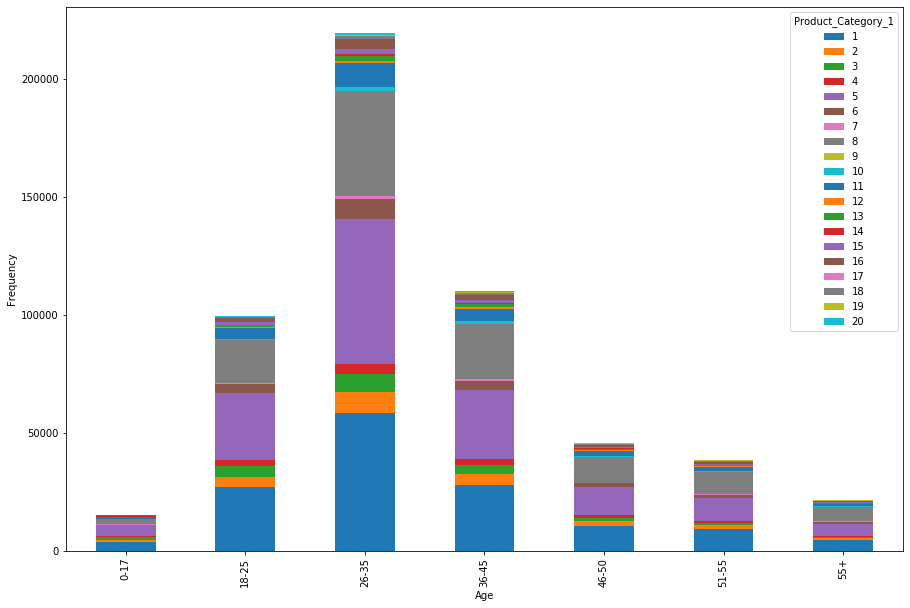

Text(0, 0.5, 'Frequency')

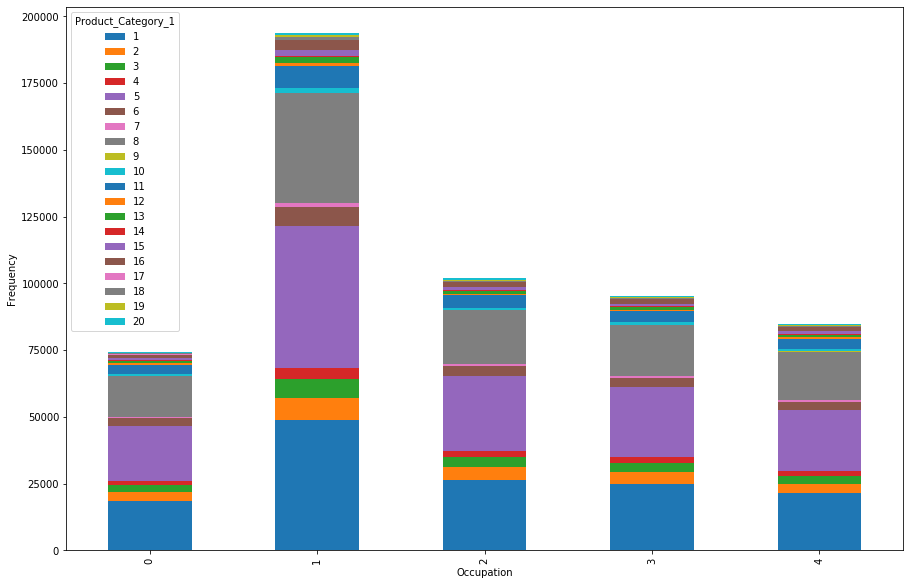

In [109]:
# Checking the frequency distribution between Age, Stay in current city years and Product category_1
#data_product_years = data.groupby(['Stay_In_Current_City_Years','Product_Category_1'],as_index=False)['Product_Category_1'].agg({'Product_Cat_Count':'count'})
Stay_Prod_Cat = data.groupby(['Stay_In_Current_City_Years', 'Product_Category_1']).size().unstack()
Stay_Prod_Cat.plot(kind='bar', stacked=True, figsize=(15,10))
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Frequency')
plt.show()
Age_Prod_Cat = data.groupby(['Age', 'Product_Category_1']).size().unstack()
Age_Prod_Cat.plot(kind='bar', stacked=True, figsize=(15,10))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
Occu_Prod_Cat = data.groupby(['Occupation', 'Product_Category_1']).size().unstack()
Stay_Prod_Cat.plot(kind='bar', stacked=True, figsize=(15,10))
plt.xlabel('Occupation')
plt.ylabel('Frequency')

-> Product category 1, 5 and 8 seems to be popular among the people irrespective of the no. of years they stayed/Occupation
-> Majority of people stayed for 1 year in the city 
-> Male tend to spend more than their female counterparts irrespective of their number of years stayed in a current city.

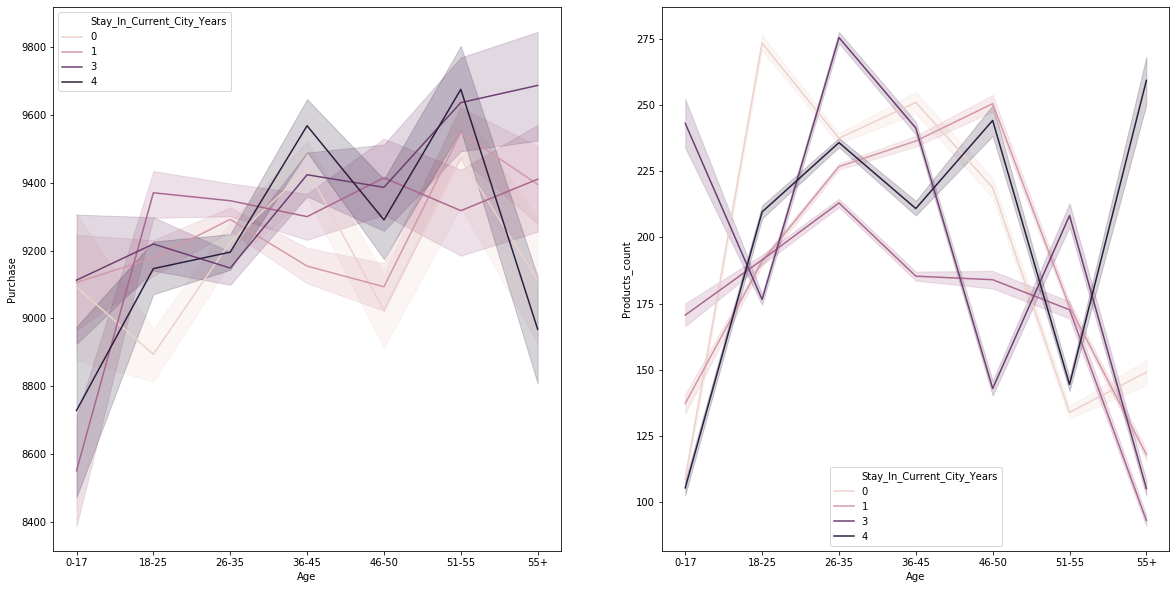

In [110]:
#Relation between Age, Stay in years w.r.t purchase value/Product count
fig, (ax_1, ax_2) = plt.subplots(1,2, figsize = (20,10))
a = sns.lineplot(x="Age", y="Purchase", hue="Stay_In_Current_City_Years", data=data,ax=ax_1)
a = sns.lineplot(x="Age", y="Products_count", hue="Stay_In_Current_City_Years", data=data_products,ax = ax_2)

-> People aged 50+ who are settled in the city for 3-4 years are making max purchase values, after they stayed for 4+ years the purchase values dropped rather too much but the products count has increased. So they must be choosing rather less costly items after staying for 4+ years
-> The purchase value of the people who are staying in the city for 3 years keeps increasing with the age.

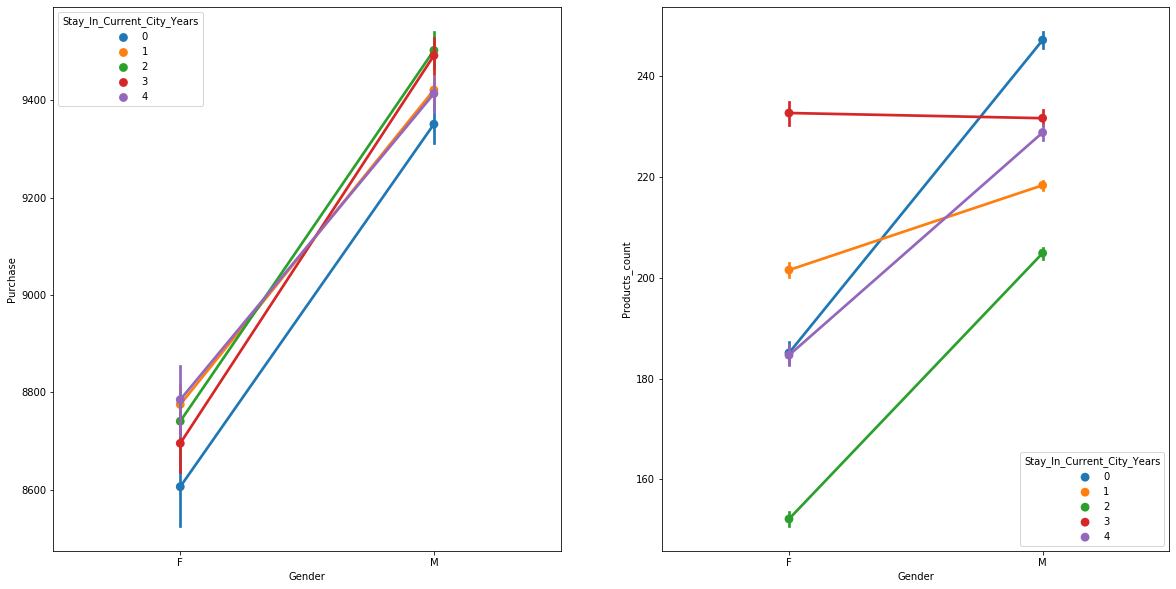

In [111]:
#Relation between Gender, Stay in years w.r.t purchase value
fig, (ax_1, ax_2) = plt.subplots(1,2, figsize = (20,10))
g = sns.pointplot(x="Gender", y="Purchase", hue = "Stay_In_Current_City_Years", data=data,ax = ax_1)
a = sns.pointplot(x="Gender", y="Products_count", hue = "Stay_In_Current_City_Years", data=data_products,ax = ax_2)

-> Though the max purchase value is always greater for Male we can observe the number of products bought by female for stay in current city years '3' is greater. A

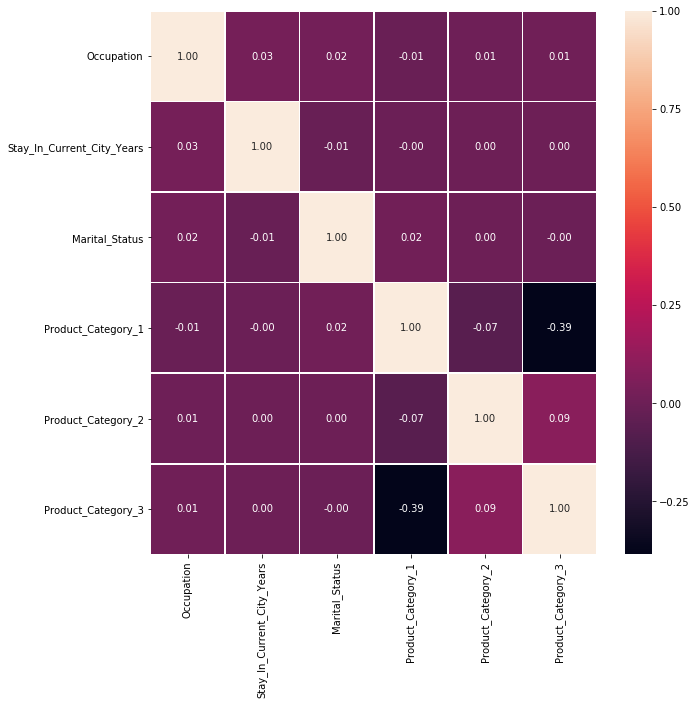

In [112]:
# Correlation heatmap of the data
cols = numeric(data)
cols = cols.drop(['User_ID','Product_ID','Purchase'])
data_corr = data[cols].corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data_corr,annot=True,fmt=".2f",linewidths=.5,ax=ax)

In [115]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
# Encoding the Categorical Columns
cat_cols = categorical(X)
le = LabelEncoder()
for i in cat_cols:
    X[i] = le.fit_transform(X[i])
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,69042,0,0,10,0,2,0,3,0.0,0.0
1,1000001,248942,0,0,10,0,2,0,1,6.0,14.0
2,1000001,87842,0,0,10,0,2,0,12,0.0,0.0
3,1000001,85442,0,0,10,0,2,0,12,14.0,0.0
4,1000002,285442,1,6,16,2,4,0,8,0.0,0.0


Feature:0, Score: 0.01100
Feature:1, Score: -0.00273
Feature:2, Score: 494.48815
Feature:3, Score: 110.84405
Feature:4, Score: 6.05319
Feature:5, Score: 321.17033
Feature:6, Score: 8.26648
Feature:7, Score: -46.50664
Feature:8, Score: -345.45001
Feature:9, Score: 9.05390
Feature:10, Score: 138.07939


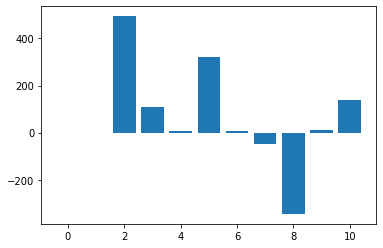

{'User_ID': 0.010997825493713241, 'Product_ID': -0.0027337122552287844, 'Gender': 494.48814651155334, 'Age': 110.8440542100915, 'Occupation': 6.053189594420235, 'City_Category': 321.1703345294975, 'Stay_In_Current_City_Years': 8.266484770129988, 'Marital_Status': -46.50664013442278, 'Product_Category_1': -345.4500089983546, 'Product_Category_2': 9.053904333132932, 'Product_Category_3': 138.079390860092}


In [116]:
#Checking the feature importance
lr=LinearRegression()
lr.fit(X,y)
importance = lr.coef_

for i,v in enumerate(importance):
    print('Feature:%0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))],importance)
plt.show()

coef_dict = {}

for coef, feat in zip(lr.coef_,X.columns):

    coef_dict[feat] = coef
print(coef_dict)

In [117]:
#Dropping the below mentioned columns as per the above feature importance values
X.drop(['User_ID','Product_ID','Marital_Status','Occupation'],axis=1,inplace = True)
X.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,0,2,3,0.0,0.0
1,0,0,0,2,1,6.0,14.0
2,0,0,0,2,12,0.0,0.0
3,0,0,0,2,12,14.0,0.0
4,1,6,2,4,8,0.0,0.0


In [118]:
X_train,X_val,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [119]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_val)
lr_rmse = np.sqrt(mean_squared_error(lr_pred,y_test))
lr_score = lr.score(X_val,y_test)
print("lr_rmse : ",lr_rmse)
score = 100*max(0,1-lr_rmse)
print(lr_score)

lr_rmse :  4646.132756952977
0.14969763271513603


In [121]:
RR = Ridge(alpha=0.05,normalize=True)
RR.fit(X_train,y_train)
RR_pred = RR.predict(X_val)
RR_rmse = np.sqrt(mean_squared_error(RR_pred,y_test))
print("RR_rmse : ",RR_rmse)

RR_rmse :  4646.380468544039


In [47]:
RF = RandomForestRegressor(max_leaf_nodes=850, random_state=0)
RF.fit(X_train,y_train)
RF_pred = RF.predict(X_val)
RF_rmse = np.sqrt(mean_squared_error(RF_pred,y_test))
print("RF_rmse : ",RF_rmse)
#2926

RF_rmse :  2925.5832440054287


In [46]:
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
DT.fit(X_train,y_train)
DT_pred = DT.predict(X_val)
DT_rmse = np.sqrt(mean_squared_error(DT_pred,y_test))
DT_score = DT.score(X_val,y_test)
print("DT_rmse : ",DT_rmse)
score = 100*max(0,1-DT_rmse)
print(DT_score)
#2945

DT_rmse :  2945.2171056306115
0.6583158868186376


In [36]:
XG = XGBRegressor(n_estimators=1000, learning_rate=0.05)
XG.fit(X_train,y_train)
XG_pred = XG.predict(X_val)
XG_rmse = np.sqrt(mean_squared_error(XG_pred,y_test))
print("XG_rmse : ",XG_rmse)
#2881

XG_rmse :  2881.02969309234


In [54]:
test = pd.read_csv(r'C:\Users\bhasy\Downloads\BlackFriday\test.csv')
UserID = test['User_ID'].copy()
test.drop(['User_ID','Product_ID','Marital_Status'],axis=1,inplace = True)
test.fillna(0,inplace=True)
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].str.split('+',expand=True)[0].astype(int)
cat_cols = categorical(test)
for i in cat_cols:
    test[i] = le.fit_transform(test[i])
#Predicting the purchase values for the test data
Pred = XG.predict(test)
final_sub = pd.DataFrame(data={'ID': UserID,'predictions': Pred})
final_sub.to_csv(r'C:\Users\bhasy\Downloads\BlackFriday\predictions.csv')